## Import Libararies

In [112]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


load dataset

In [9]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Preparation

In [17]:
#checking null value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
df.duplicated().sum()

0

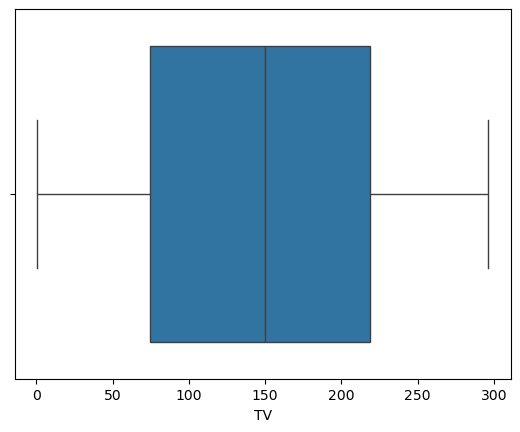

In [27]:
#checking outlier
sns.boxplot(x=df["TV"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

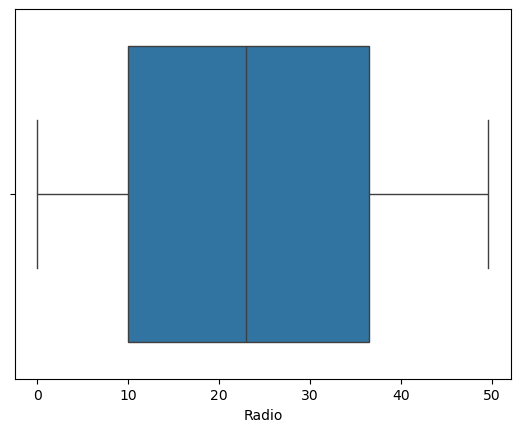

In [29]:
sns.boxplot(x=df["Radio"])
plt.show

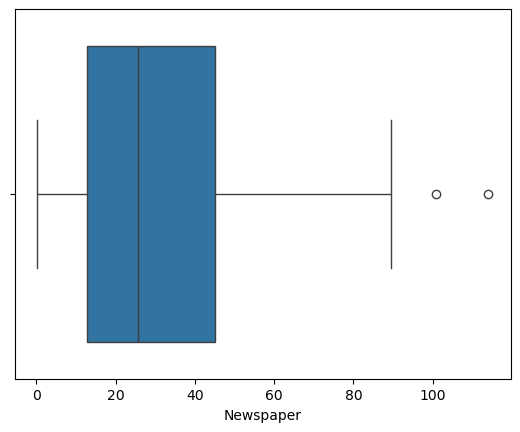

In [33]:
sns.boxplot(x=df["Newspaper"])
plt.show()

In [41]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)]

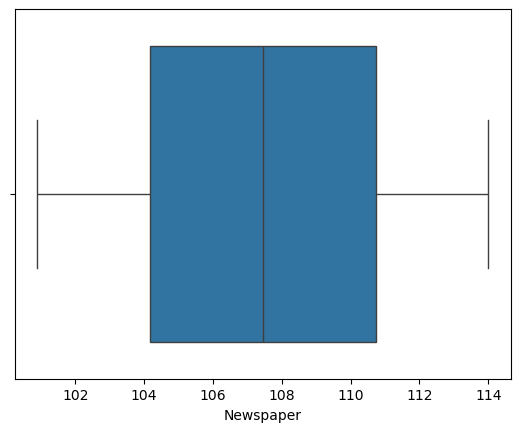

In [47]:
sns.boxplot(x=outliers["Newspaper"])
plt.show()

## Exploratory Data Analysis (EDA)

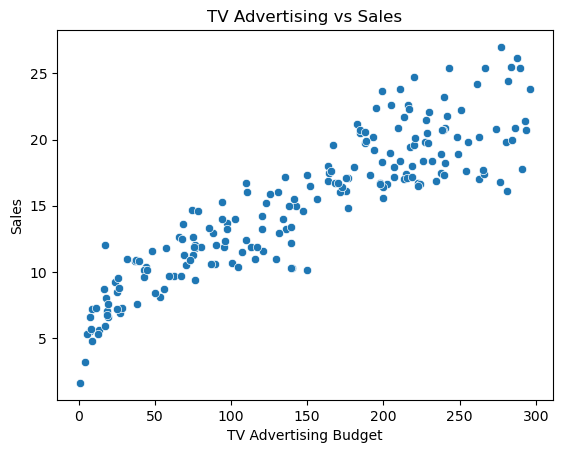

In [51]:
# Scatter plot for TV vs Sales
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

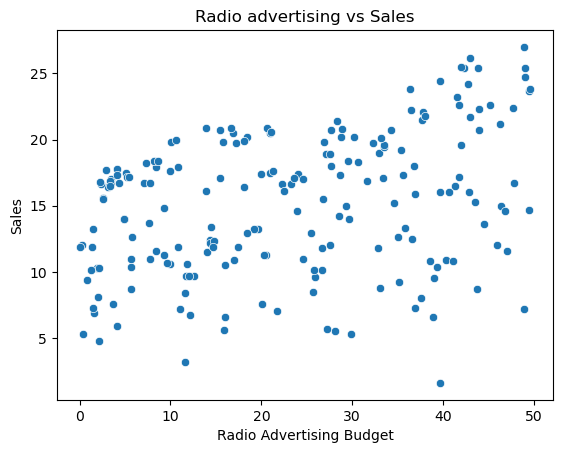

In [53]:
sns.scatterplot(data=df,x="Radio", y="Sales")
plt.title("Radio advertising vs Sales")
plt.xlabel("Radio Advertising Budget")
plt.ylabel("Sales")
plt.show()

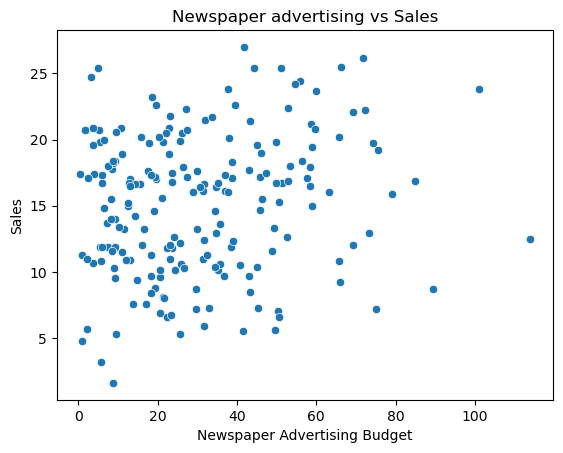

In [59]:
sns.scatterplot(data=df,x="Newspaper", y="Sales")
plt.title("Newspaper advertising vs Sales")
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Sales")
plt.show()

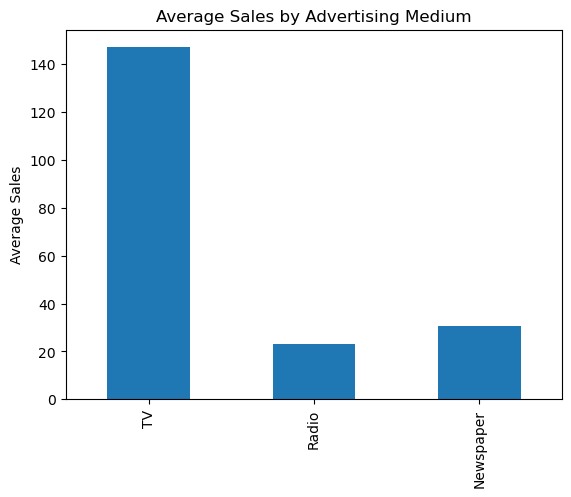

In [67]:
df[['TV', 'Radio', 'Newspaper']].mean().plot(kind='bar')
plt.title('Average Sales by Advertising Medium')
plt.ylabel('Average Sales')
plt.show()


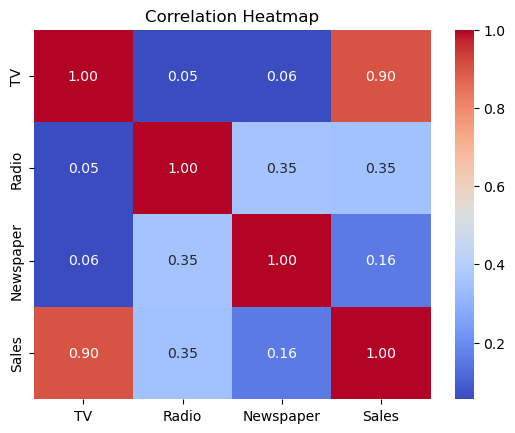

In [69]:
import numpy as np

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection

In [79]:
X=df.drop("Sales",axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [81]:
y=df["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [118]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_lin)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_lin)}\n')

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_rf)}\n')


Linear Regression:
Mean Squared Error: 2.907756910271091
R^2 Score: 0.9059011844150826

Random Forest:
Mean Squared Error: 1.4374328500000009
R^2 Score: 0.9534827934927883

